In [63]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import PhenomA as pa
import LISA as li
import WaveformTools as wt
reload(wt)


<module 'WaveformTools' from 'WaveformTools.py'>

# Setup LISA object, load sky & polarization averaged transfer function, plot sensitivity curve


### LISA object options

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Tobs, default=4 yr ---- example: lisa = li.LISA(Tobs=li.YEAR)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Larm, default=2.5e9 (meters)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; NC,   default=2 (number of data channels, 1 or 2)

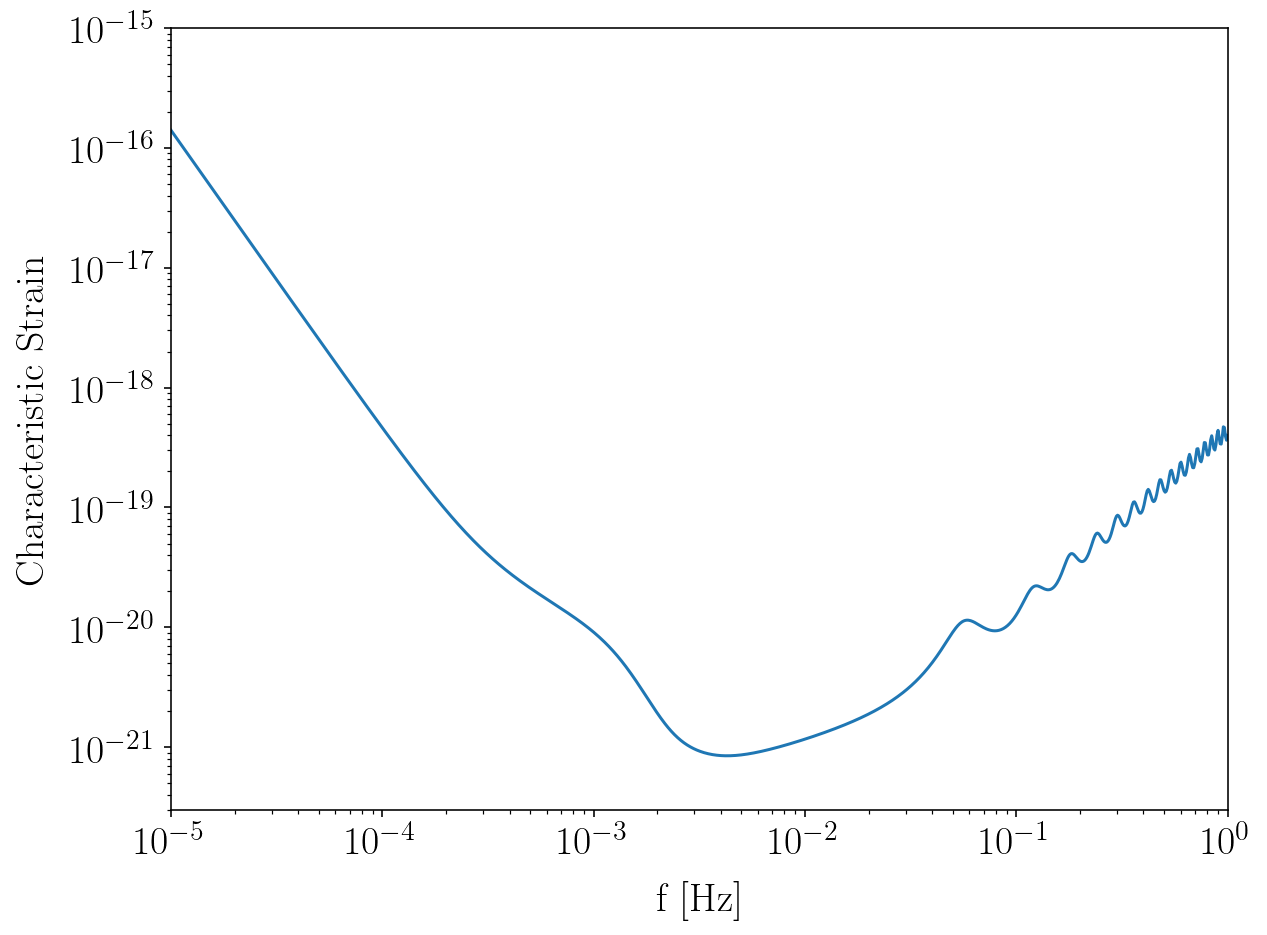

In [64]:
# create LISA object
lisa = li.LISA() 

# Plot LISA's sensitivity curve
f  = np.logspace(np.log10(1.0e-5), np.log10(1.0e0), 1000)
Sn = lisa.Sn(f)
li.PlotSensitivityCurve(f, Sn) # provide additional argument, e.g. 'SensitivityCurve.pdf', to save figure

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if sys.path[0] == '':


0
Redshift provided. 
	Luminosity Distance........... 250212.571052 Mpc

SNR........ 116.176940266
1
Redshift provided. 
	Luminosity Distance........... 185335.553941 Mpc

SNR........ 126.193434606
2
Redshift provided. 
	Luminosity Distance........... 185335.553941 Mpc

SNR........ 126.151461678
3
Redshift provided. 
	Luminosity Distance........... 185335.553941 Mpc

SNR........ 166.659365351
4
Redshift provided. 
	Luminosity Distance........... 185335.553941 Mpc

SNR........ 126.193386913
5
Redshift provided. 
	Luminosity Distance........... 171067.089022 Mpc

SNR........ 129.099416169
6
Redshift provided. 
	Luminosity Distance........... 148582.897445 Mpc

SNR........ 240.702455512
7
Redshift provided. 
	Luminosity Distance........... 148582.897445 Mpc

SNR........ 178.702716069
8
Redshift provided. 
	Luminosity Distance........... 131613.765892 Mpc

SNR........ 184.958184691
9
Redshift provided. 
	Luminosity Distance........... 131613.765892 Mpc

SNR........ 139.525193638
10
Redshif

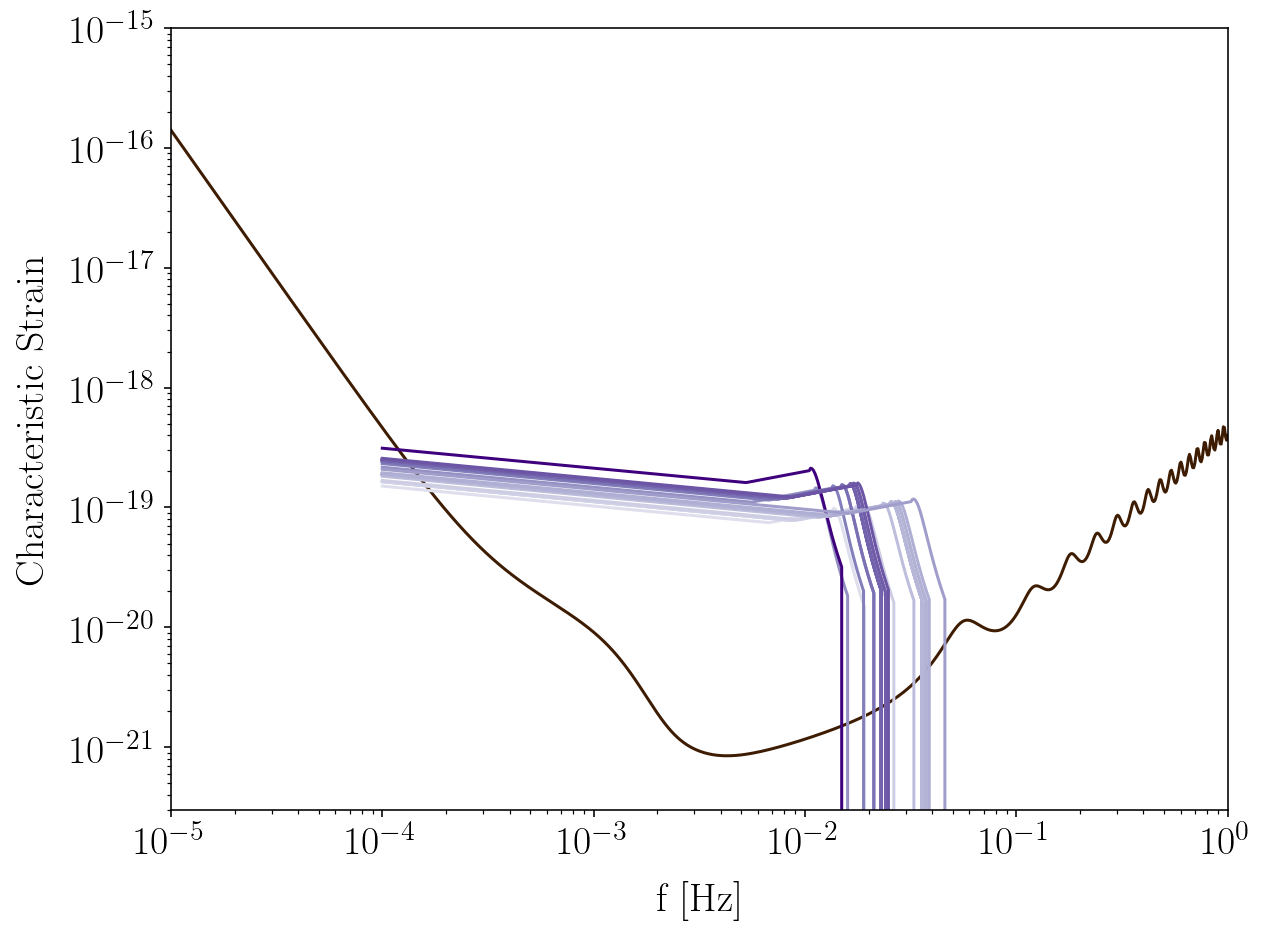

In [120]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm


# Choose a colormap
colormap = cm.summer_r
colormap = cm.Purples

#colormap = cm.Reds_r

normalize = mcolors.Normalize(vmin=80, vmax=240)

data=np.genfromtxt('mergerNoSpin.txt', dtype=None, delimiter=" ",names=True)
#print data['mass1']

m1 = data['mass1']*pa.TSUN 
m2= data['mass2']*pa.TSUN
z= data['redshift']
f_start  = data['redshift']*0.0+ 1.e-4
#print(lisa.Tobs)
Tobs=data['redshift']*0+lisa.Tobs
M = m1 + m2 # total mass
eta = m1*m2/M**2 # symmetric mass ratio
Mc=M*eta**(3./5)


theta = 0.57 #RA=153 deg =2.6 rad
phi = 0.63 #dec = +54 deg astro, 36 deg phys = 0.63 rad
iota = 0.0

fig, ax = plt.subplots(1, figsize=(8,6))
plt.tight_layout()

ax.set_xlabel(r'f [Hz]', fontsize=20, labelpad=10)
ax.set_ylabel(r'Characteristic Strain', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=20)
        
ax.set_xlim(1.0e-5, 1.0e0)
ax.set_ylim(3.0e-22, 1.0e-15)

f = np.logspace(np.log10(1.0e-5), np.log10(1.0e0), 1000)
ax.loglog(f, np.sqrt(f*lisa.Sn(f)),color='xkcd:chocolate')
colors = plt.cm.cool(np.linspace(0,1,len(data['redshift'])))


for j in range(len(data['redshift'])):
    print(j)
    m1[j]=m1[j]+j*pa.TSUN
    binary = wt.Binary(m1[j], m2[j], z[j])
    binary.f_start = f_start[j]
#print(binary.f_start)

    binary.T_merge = 5.*Mc[j]/(8.*np.pi*binary.f_start*Mc[j])**(8./3.)

#print(Tobs)
      
#    if (any(binary.T_merge) > any(Tobs)):
#    binary.f_end = (5.*Mc[j]/(np.abs(Tobs[j]-binary.T_merge)))**(3./8.)/(8.*np.pi*Mc[j])
#else:
    binary.f_end = pa.get_freq(M[j], eta[j], "cut") # PhenomA cut-off frequency i.e. frequency upper bound    
        
#Delta_logf = np.log(binary.f_end) - np.log(binary.f_start)

#    binary.SetFreqBounds(lisa)

#print(f_end)

#for j in range(len(data['redshift'])):
#print(lisa)

    freqs, X_char = binary.CalcStrain(lisa)
    snr = binary.CalcSNR(freqs, X_char, lisa)
    print("\nSNR........ {}".format(snr))
    color = colormap(normalize(snr)
    ax.loglog(freqs, np.sqrt(freqs)*X_char, color=color) 
#binary.PlotStrain(freqs, X_char, lisa)

plt.savefig('Justin.SN.BH.pdf', bbox_inches='tight')

# Just a check to make sure the averaging of polarization was done correctly
    # The answer (SNR) should be ~ 140

In [123]:
print(pa.TSUN)
for j in range(len(data['redshift'])):
    print(j,M[j]/pa.TSUN,z[j])

4.9169e-06
(0, 53350.0, 21.506)
(1, 53308.0, 16.4)
(2, 53285.99999999999, 16.4)
(3, 79855.0, 16.4)
(4, 53304.99999999999, 16.4)
(5, 53296.0, 15.263)
(6, 106498.99999999999, 13.458)
(7, 80037.00000000001, 13.458)
(8, 79872.00000000001, 12.083)
(9, 53304.0, 12.083)
(10, 79913.0, 12.083)
(11, 53182.0, 10.994)
(12, 79583.0, 10.994)
(13, 53348.99999999999, 10.994)
(14, 80021.0, 10.994)
(15, 53348.99999999999, 10.994)
(16, 53274.99999999999, 10.994)
(17, 80021.0, 10.994)
(18, 53348.99999999999, 10.994)
(19, 53241.99999999999, 10.994)
(20, 79918.0, 10.994)
(21, 53348.99999999999, 10.994)
(22, 79788.0, 10.994)
(23, 80021.0, 10.994)
(24, 53348.99999999999, 10.994)
(25, 53348.99999999999, 10.994)
(26, 80021.0, 10.994)
(27, 53279.00000000001, 10.529)
(28, 53304.99999999999, 10.529)
(29, 79882.0, 10.529)
(30, 80021.0, 10.529)
(31, 53325.0, 10.106)
(32, 79930.0, 10.106)
(33, 53156.0, 8.458)


Luminosity Distance provided. 
	redshift........... 2.31173518649e-07

SNR........ 139.707047722


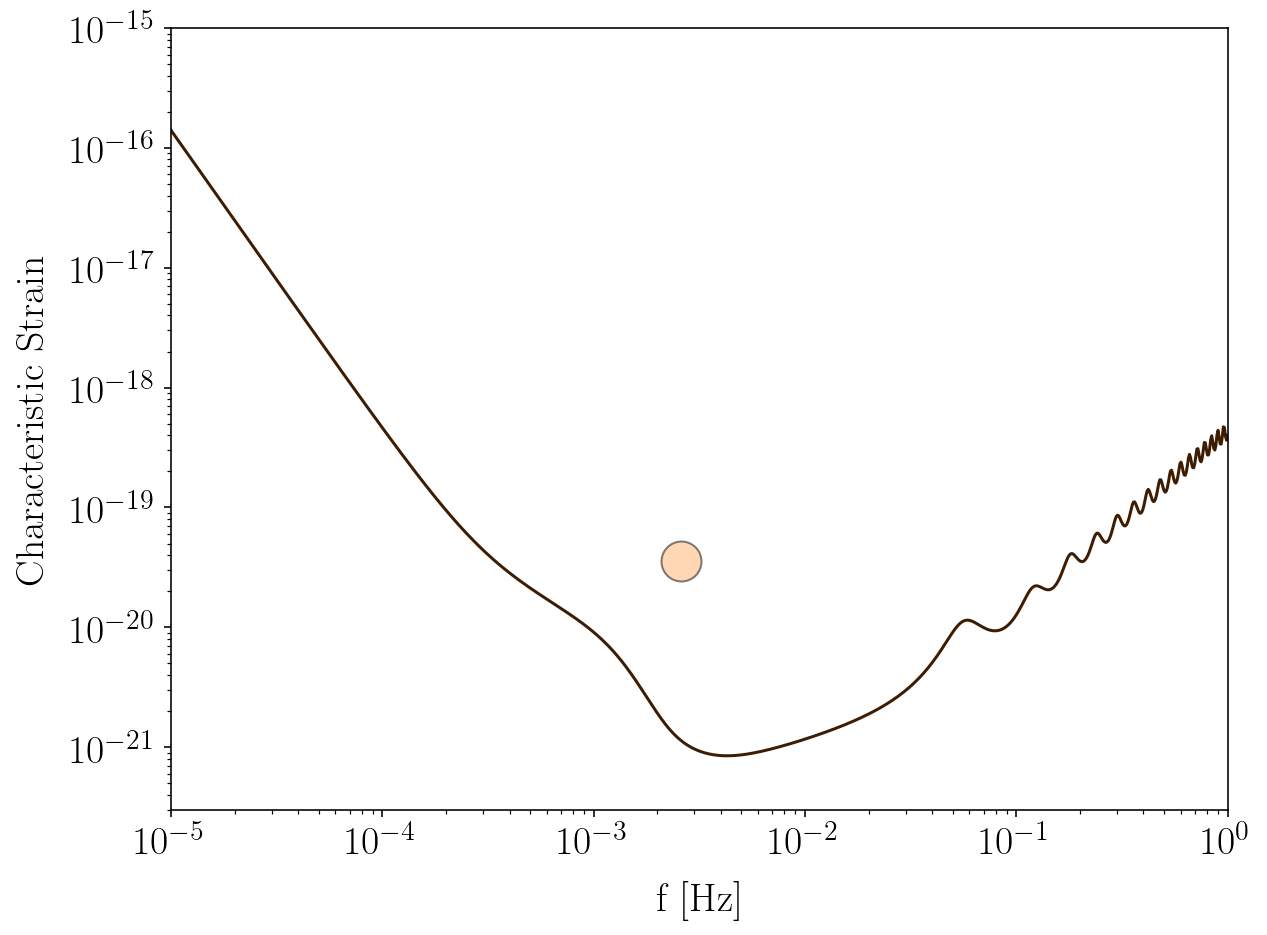

In [157]:


# sky, iota, and polarization averaged response
m1 = 0.50*pa.TSUN 
m2 = 0.25*pa.TSUN
Dl = 1.0e-3*wt.MPC
f_start  = 2.6e-3

binary = wt.Binary(m1, m2, Dl=Dl)
binary.f_start = f_start
binary.SetFreqBounds(lisa)

freqs, X_char = binary.CalcStrain(lisa)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
binary.PlotStrain(freqs, X_char, lisa)

In [107]:
# numerically check that this polarization averaged result, when numerically averaged over theta, phi, iota,
#    return the numerically averaged result
num = 30
theta_arr = np.linspace(0, np.pi, num)
phi_arr = np.linspace(0, 2*np.pi, num)
iota_arr = np.linspace(0, np.pi, num)

tot = 0.0

for i in range(num):
    theta = theta_arr[i]
    for j in range(num):
        phi = phi_arr[j]
        for k in range(num):
            iota = iota_arr[k]
            freqs, X_char = binary.CalcStrain(lisa, theta, phi, iota)
            snr = binary.CalcSNR(freqs, X_char, lisa)

            tot += snr**2

avg_snr = np.sqrt(tot/num**3)
print(avg_snr)

160.11082671653546
